In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.clusterfit as cf
import seaborn as sns
plt.style.use('nice.mplstyle')

In [76]:
# data = pd.read_hdf('../data/halo_properties_in_lightcone0.hdf5')
data = pd.read_csv('../data/samples_in_lightcone0.csv')
frac = pd.read_csv('../data/jay_id_core_fraction.csv')
obs  = pd.read_csv('../data/obs-concentration.csv')
data = data.merge(frac, on=['SOAPID'], validate='one_to_one') # this should match both SOAPID and snap_num. 

In [77]:
distance = (data['x_lc']**2 + data['y_lc']**2 + data['z_lc']**2)**(1/2)

In [78]:
np.sum(distance < 500)

623

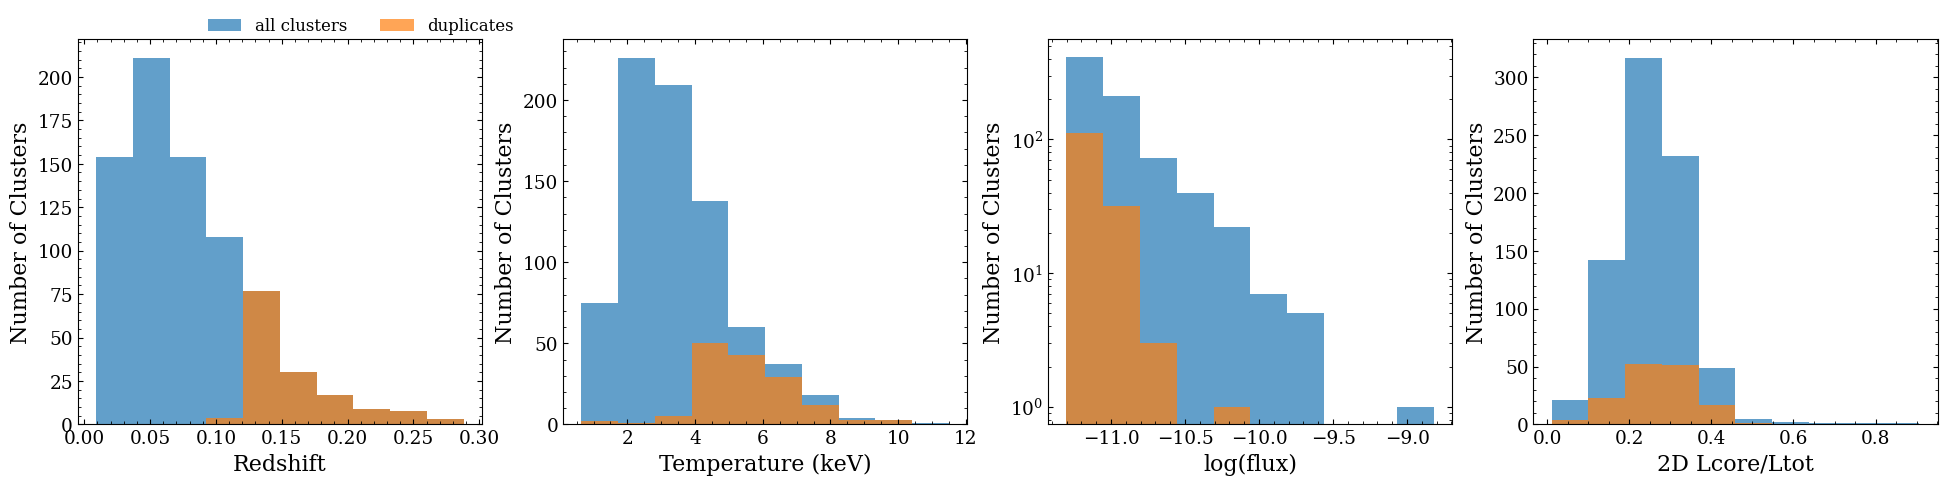

In [79]:
fig, ax = plt.subplots(1, 4, figsize=(24, 5))

hist_info = ax[0].hist(data['ObservedRedshift'], bins=10, label='all clusters', alpha=0.7)
ax[0].hist(data['ObservedRedshift'][distance > 500], bins=hist_info[1], label='duplicates', alpha=0.7)
ax[0].set_xlabel('Redshift')
ax[0].set_ylabel('Number of Clusters')
ax[0].legend(loc='upper center', bbox_to_anchor=(0.7, 1.1), 
             ncol=2, fancybox=True, shadow=True)

hist_info = ax[1].hist(data['SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision'], bins=10, alpha=0.7)
ax[1].hist(data['SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision'][distance > 500], bins=hist_info[1], alpha=0.7)
ax[1].set_xlabel('Temperature (keV)')
ax[1].set_ylabel('Number of Clusters')

hist_info = ax[2].hist(np.log10(data['Flux']), bins=10, alpha=0.7)
ax[2].hist(np.log10(data['Flux'][distance > 500]), bins=hist_info[1], alpha=0.7)
ax[2].set_xlabel('log(flux)')
ax[2].set_ylabel('Number of Clusters')
ax[2].set_yscale('log')

hist_info = ax[3].hist(data['2DLcore/Ltot'], bins=10, alpha=0.7)
ax[3].hist(data['2DLcore/Ltot'][distance > 500], bins=hist_info[1], alpha=0.7)
ax[3].set_xlabel('2D Lcore/Ltot')
ax[3].set_ylabel('Number of Clusters')

plt.show()

## Are x,y,z_lc the coordinates I think they are?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numba import njit
data = pd.read_csv('../data/samples_in_lightcone0.csv')
# data = pd.read_hdf('../data/halo_properties_in_lightcone0.hdf5')

In [7]:
# The first lightcone should have distance 0 to ~215 Mpc
redshift_lc = data['redshift']
print(np.min(redshift_lc[data['snap_num']==77]), np.max(redshift_lc[data['snap_num']==77]))
print(np.min(redshift_lc[data['snap_num']==76]), np.max(redshift_lc[data['snap_num']==76]))

0.0076054335 0.024895787
0.025010347 0.074953794


In [6]:
# The first lightcone should have distance 0 to ~215 Mpc
distance = (data['x_lc']**2 + data['y_lc']**2 + data['z_lc']**2)**(1/2)
print(np.min(distance[data['snap_num']==77]), np.max(distance[data['snap_num']==77]))
print(np.min(distance[data['snap_num']==76]), np.max(distance[data['snap_num']==76]))

32.78085027161353 109.10729716792189
101.48418683742206 324.1037885213259


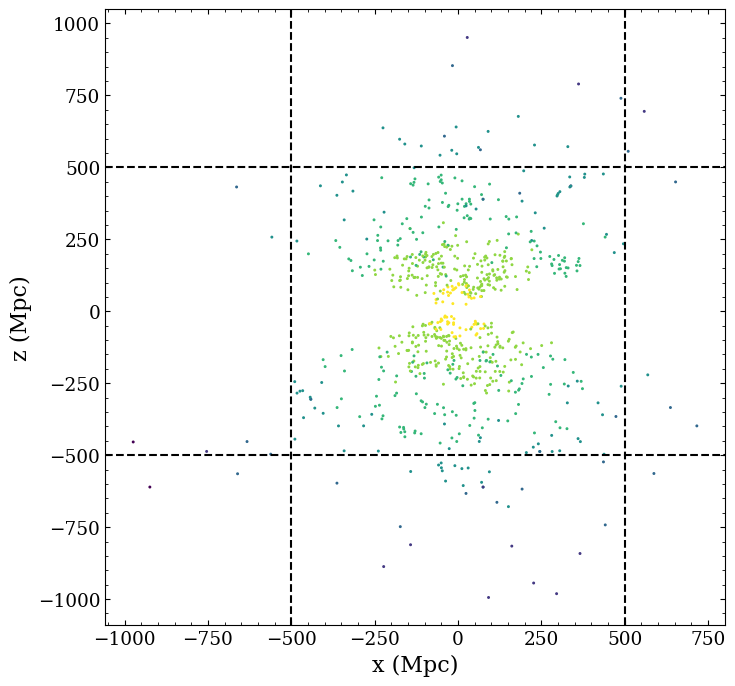

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plt.scatter(data['x_lc'], data['z_lc'], s=5, marker='.', c=data['snap_num'])
plt.xlabel('x (Mpc)')
plt.ylabel('z (Mpc)')
plt.axvline(500, color='k', linestyle='--')
plt.axvline(-500, color='k', linestyle='--')
plt.axhline(500, color='k', linestyle='--')
plt.axhline(-500, color='k', linestyle='--')
plt.show()

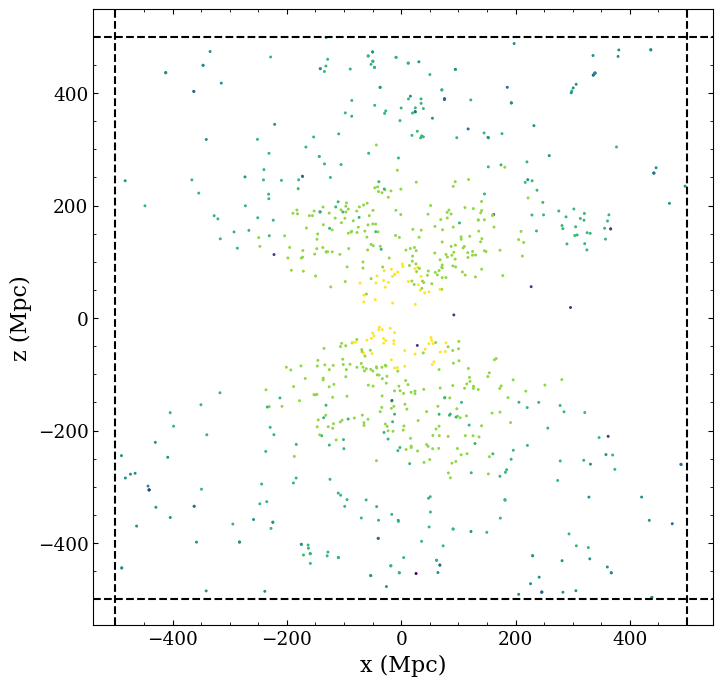

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plt.scatter(shift_to_one_box(np.array(data['x_lc']), 1000), 
            shift_to_one_box(np.array(data['z_lc']), 1000), s=5, marker='.', c=data['snap_num'])

plt.xlabel('x (Mpc)')
plt.ylabel('z (Mpc)')
plt.axvline(500, color='k', linestyle='--')
plt.axvline(-500, color='k', linestyle='--')
plt.axhline(500, color='k', linestyle='--')
plt.axhline(-500, color='k', linestyle='--')
plt.show()

# To match the duplicate clusters by coordinates

In [1]:
import numpy as np
import pandas as pd
from numba import njit
# data = pd.read_csv('../data/samples_in_lightcone0.csv')
data = pd.read_hdf('../data/halo_properties_in_lightcone0.hdf5')

In [31]:
distance = (data['x_lc']**2 + data['y_lc']**2 + data['z_lc']**2)**(1/2)
data_near = data[distance < 500]
data_dup = data[distance > 500]

In [39]:
data[data.duplicated(subset=['MfofSOAP'], keep=False)].sort_values(by='MfofSOAP')

,lc_id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,snap_num,MfofSOAP,...,M500,GasMass,LX0InRestframeWithoutRecentAGNHeating,LX0InRestframeWithoutRecentAGNHeatingCoreExcision,GasTemperatureWithoutRecentAGNHeatingCoreExcision,SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz
8293524,6042303,0.431223,-82.621496,96.581102,5.003128e+12,-25.051471,217.140811,-1687.939483,68,4.999342e+12,...,3.152506e+12,1.088506e+11,4.307975e+41,4.307975e+41,1445888.0,2682880.0,1.282865e+41,119.108640,185.408570,-165.591430
6007361,9540876,0.540582,-5.809754,-122.159240,5.001252e+12,-1096.951936,-1744.681380,-209.690799,66,4.999342e+12,...,3.216930e+12,7.945690e+10,1.878359e+41,1.878359e+41,1396736.0,2342912.0,2.364962e+41,-208.916990,5.983032,80.783080
6197230,6894838,0.555754,-43.515223,36.891403,5.000294e+12,1230.096218,923.293763,-1460.334987,66,4.999342e+12,...,2.430952e+12,8.831526e+10,4.791176e+41,4.791176e+41,1630208.0,2260992.0,2.531701e+41,-40.019653,-79.819580,100.480350
11030701,8876874,0.395288,7.426172,74.604513,5.002352e+12,414.733125,1506.142509,203.620040,69,4.999342e+12,...,3.049427e+12,3.207804e+10,4.053614e+40,7.316071e+39,724992.0,1576960.0,5.308405e+40,33.036865,-254.163090,44.536865
3573164,10753261,0.517611,-67.241800,-71.324416,5.000867e+12,247.233726,-731.446819,-1840.511701,67,4.999342e+12,...,4.415226e+12,3.151432e+11,1.037181e+42,1.037181e+42,1933312.0,3362816.0,2.228850e+41,-449.586850,-210.486820,649.113160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852476,12084196,0.247300,8.975642,-128.996504,1.981122e+15,-633.172223,-782.000123,158.927397,72,1.981320e+15,...,1.091815e+15,1.300172e+14,1.179152e+45,1.089949e+45,84017150.0,79822850.0,3.322811e+45,-57.893433,-255.093380,-175.793460
4323214,12084196,0.259777,-51.476733,161.002510,1.981122e+15,-632.877120,217.886060,-840.766920,72,1.981320e+15,...,1.091815e+15,1.300172e+14,1.179152e+45,1.089949e+45,84017150.0,79822850.0,3.322811e+45,-57.893433,-255.093380,-175.793460
4249167,12084196,0.225549,-63.123253,30.781368,1.981122e+15,366.437123,218.278893,-841.569017,72,1.981320e+15,...,1.091815e+15,1.300172e+14,1.179152e+45,1.089949e+45,84017150.0,79822850.0,3.322811e+45,-57.893433,-255.093380,-175.793460
1246711,13554111,0.200592,5.700358,8.406088,2.000303e+15,828.580571,122.444099,83.606773,73,2.001111e+15,...,1.411773e+15,1.797702e+14,1.845387e+45,1.633530e+45,87425020.0,88080380.0,3.517943e+45,429.053700,51.153687,140.053710


In [32]:
len(data_dup)

12029359

In [33]:
@njit
def shift_to_one_box(x, box_size):
    half_box = box_size / 2
    return (x + half_box) % box_size - half_box

In [35]:
for bin in range(1, 16): # Mpc the size of the little box to search for it's near universe counterparts
    count_found = 0
    count_not_found = 0
    count_multiple = 0
    for i in range(len(data_dup)): # ok stackexchange tells me I shouldn't iterate over dataframes
        x = data_dup['x_lc'].iloc[i]
        y = data_dup['y_lc'].iloc[i]
        z = data_dup['z_lc'].iloc[i]

        vx = data_dup['Vx'].iloc[i]
        vy = data_dup['Vy'].iloc[i]
        vz = data_dup['Vz'].iloc[i]

        z = data_dup['redshift'].iloc[i]

        # dx = - vx * z / 70 / (1+z)# coordinate shift by peculiar velocity in Mpc
        # dy = - vy * z / 70 / (1+z)
        # dz = - vz * z / 70 / (1+z)

        x = shift_to_one_box(x, 1000) #+ dx
        y = shift_to_one_box(y, 1000) #+ dy
        z = shift_to_one_box(z, 1000) #+ dz

        duplicates = data_near[(data_near['x_lc'] > x - bin) & (data_near['x_lc'] < x + bin) &
                            (data_near['y_lc'] > y - bin) & (data_near['y_lc'] < y + bin) &
                            (data_near['z_lc'] > z - bin) & (data_near['z_lc'] < z + bin)]
 
        n_dup = len(duplicates)
        if n_dup == 1:
            count_found += 1
        elif n_dup == 0:
            count_not_found += 1
        else:
            count_multiple += 1

    #     if count_found == 2:
    #         break
    # if count_found == 2:
    #     break
        if i >= 10000-1:
            break
    print('|', bin, '|', count_found,'|', count_not_found,'|', count_multiple, '|')

| 1 | 25 | 9975 | 0 |
| 2 | 186 | 9796 | 18 |
| 3 | 512 | 9392 | 96 |
| 4 | 917 | 8736 | 347 |
| 5 | 1363 | 7892 | 745 |
| 6 | 1835 | 6787 | 1378 |
| 7 | 2038 | 5731 | 2231 |
| 8 | 2224 | 4633 | 3143 |
| 9 | 2093 | 3685 | 4222 |
| 10 | 1847 | 2879 | 5274 |
| 11 | 1562 | 2122 | 6316 |
| 12 | 1269 | 1545 | 7186 |
| 13 | 1048 | 1043 | 7909 |
| 14 | 701 | 686 | 8613 |
| 15 | 402 | 467 | 9131 |


On all SOAP catalogues without any cut, 12,194,118 halos. And out of the first 10,000 halos in whatever order they are given (because it takes too long to loop over all of them)

| Bins (Mpc) | Found One | Not Found | Multiple |
| ---- | ----- | --------- | -------- |
| 1 | 26 | 9974 | 0 |
| 2 | 188 | 9799 | 13 |
| 3 | 488 | 9392 | 120 |
| 4 | 916 | 8740 | 344 |
| 5 | 1373 | 7887 | 740 |
| 6 | 1760 | 6844 | 1396 |
| 7 | 2036 | 5721 | 2243 |
| 8 | 2090 | 4697 | 3213 |
| 9 | 2015 | 3706 | 4279 |
| 10 | 1854 | 2843 | 5303 |
| 11 | 1575 | 2126 | 6299 |
| 12 | 1278 | 1514 | 7208 |
| 13 | 1005 | 1040 | 7955 |
| 14 | 720 | 711 | 8569 |
| 15 | 478 | 454 | 9068 |

On our 771 samples.
| Bins (Mpc) | Found One | Not Found | Multiple |
| ---- | ----- | --------- | -------- |
| 1 | 0 | 148 | 0 |
| ... | ... | ... | ... |
| 16 | 0 | 148 | 0 |
| 17 | 1 | 147 | 0 |
| 18 | 2 | 146 | 0 |
| 19 | 2 | 146 | 0 |
| 20 | 2 | 146 | 0 |
| 21 | 1 | 146 | 1 |
| 22 | 1 | 146 | 1 |
| 23 | 1 | 146 | 1 |
| 24 | 1 | 146 | 1 |
| 25 | 0 | 146 | 2 |
| 26 | 0 | 146 | 2 |
| 27 | 0 | 146 | 2 |
| 28 | 0 | 146 | 2 |
| 29 | 1 | 145 | 2 |
| 30 | 0 | 145 | 3 |